# 網路爬蟲 (Web) Crawler
2019/11/30 國立竹山高中 </br>
By AI4Kids 團隊

## **網路爬蟲 (Web) Crawler 學習目標說明**
* **1. 網際網路中有千千萬萬的資料，窮極一生也無法全部閱讀。而我們想要的不僅僅是簡單的資料，而是經過過濾、分析、彙整後的資訊，而網路爬蟲正是可以幫忙我們這樣做的工具之一。**

</br>

* **2.選定我們有興趣的資料，例如：(1) 商業的資訊 (2) 選舉、輿論的資訊 (3) 政府釋出的公開資料：氣象、空污、各國來台觀光...等等**

</br>

## **學習內容**
### 第一部份：認識常用的資料分析套件 numpy, pandas
* **1. 認識 numpy**
* **2. 認識 pandas**
* **3. 資料視覺化**

**Ref: [python數據分析入門](https://hackmd.io/@cube/Bk9bwQppN)**

### 第二部份：網路爬蟲 (Web) Crawler 實作
* **實作：竹山 PM 2.5 空氣品質監測**

**Ref: [Python 爬蟲筆記-1](https://medium.com/@gordonfang_85054/python-%E7%88%AC%E8%9F%B2%E7%AD%86%E8%A8%98-1-15fdec38393c)**

### 第三部份：資料的分析、處理與視覺化
* **1. 實作：資料分析、處理**
* **2. 實作：資料視覺化**


### **1. 認識 numpy**
* 做數據分析時常把 list 轉成 array，NumPy 的 ndarray (N-Dimentional Array)是一個快速、節省空間的多維度陣列，可提供向量運算及複雜的功能。 

</br>

* NumPy 的 ndarray 中的所有元素的資料型態必須相同，每個陣列都有一個 shape(各維度大小的元組)和 dtype (元素資料類型)

    轉換的優先順序為：字串 > 數字 > 布林。


In [16]:
# --------------------------------------------
# 使用 numpy 直接建立陣列
import numpy as np

# 1 維陣列
a = np.array([1,2,3])            
a
print('幾維陣列 =',a.ndim)               # 幾維陣列
print(a.shape)                          # 陣列形狀 
print(a.size)                           # 陣列元素個數 

a.dtype                          # 陣列的資料型態 
a_f = a.astype(np.float64)       # 轉換成浮點數型態 
print(a_f.dtype)

幾維陣列 = 1
(3,)
3
float64


In [17]:
# --------------------------------------------
# 2 維陣列
b = np.array(['1','2.2','3.33'])
b_f = b.astype(float)            # 字串陣列若全都是數字，可用astype將其轉換為數值
print(b_f)
print(b_f.dtype)

c = np.array([[1,2,3], [4,5,6]]) # 二維陣列
c
print('幾維陣列 =', c.ndim)
print(c.shape)
print(c.size)

[1.   2.2  3.33]
float64
幾維陣列 = 2
(2, 3)
6


### **2. 認識 pandas**

* **Python 的 Excel，pandas 可以擷取 JSON, CSV, Excel, HTML 等格式的資料，主要資料型態有 Series(一維)、DataFrame(二維、類似表格)。**

* **基於 Numpy 構建，包含許多操作資料與統計的函式，讓以 NumPy 為中心的應用變的更加簡單。**

In [1]:
# --------------------------------------------
# 讀檔範例：讀取 CSV 檔案
# 以 OpenData 的 AQI 資料為例: 至 https://opendata.epa.gov.tw/ws/Data/AQI/?$format=csv 下載回 CSV 檔。
#
# 下行程式碼，直接執行會報錯誤！須先修改 [使用者登入名稱] 才能正常運作。
import pandas as pd
df=pd.read_csv(r'C:\Users\[使用者登入名稱]\Desktop\AQI.csv')

In [2]:
# --------------------------------------------
# 讀檔範例：讀取 Html 檔案
# 台灣銀行 牌告匯率 網頁：http://rate.bot.com.tw/xrt?Lang=zh-TW
# import pandas as pd
# html_file = pd.read_html('http://rate.bot.com.tw/xrt?Lang=zh-TW') 
# print(html_file[0])

'''
filename='money_exchange_rate.csv'
df = html_file[0]
df.to_csv(filename, index=False)
'''

"\nfilename='money_exchange_rate.csv'\ndf = html_file[0]\ndf.to_csv(filename, index=False)\n"

In [ ]:
# --------------------------------------------
# 檔案下載範例
#
# 注意：下載時，若是有 network error 則試著再 run 一次
# 
from google.colab import files
filename='money_exchange_rate.csv'

# 存檔至 csv 中
df=html_file[0]
df.to_csv(filename,encoding='utf8')  

# 下載
files.download(filename)

### **3. 資料視覺化(使用 numpy 為例)**
* **利用 matplotlib 繪圖套件，將資料以圖表方式具體呈現**

[0 1 2 3 4 5 6 7 8 9]


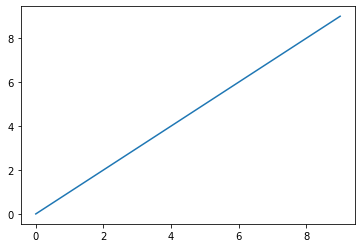

In [1]:
# --------------------------------------------
# 使用 matplotlib 套件來繪圖 
# 在 colab 或是 jupyter notebook 須執行以下這行指令，就可讓圖立即顯示出來。 
%matplotlib inline  

# 繪圖練習
import matplotlib.pyplot as plt
import numpy as np
data = np.arange(10)
print(data)
plt.plot(data)

Text(0, 0.5, 'y label')

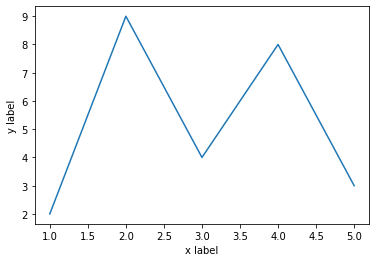

In [3]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 9, 4, 8, 3]
plt.plot(x, y)
plt.xlabel('x label')            # 加上座標軸的label
plt.ylabel('y label')

# 第二部份：網路爬蟲 (Web) Crawler 實作
## 實作：竹山 PM 2.5 空氣品質監測

此程式碼示範如何使用政府開放資料平台，取得竹山空氣監測站的資訊。取得空氣監測數據後，便可以再自行進一步的運用

API來源

https://opendata.epa.gov.tw/Data/Details/ATM00615/

使用說明

https://opendata.epa.gov.tw/DevelopZone/Sample/ATM00615/

In [23]:
# --------------------------------------------
###     爬蟲主體程式
# --------------------------------------------
# 匯入將會使用到的套件
import http.client
import ssl
import json
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
sns.set()

# API 主機位置
host = "opendata.epa.gov.tw"

# API 目錄
url = "/webapi/api/rest/datastore/"

# API 資源 ID (南投縣竹山)
resource_id = "355000000I-000197"

resource_url = url+resource_id

# HTTP Headers, 表示要收到 json type 格式的回應
headers = {'Content-Type': "application/json"}

# 使用自簽 SSL，避免 HTTPS 連結的錯誤
ssl = ssl._create_unverified_context()

# 設定HTTPS連線目的地主機，並加入自簽的SSL憑證
conn = http.client.HTTPSConnection(host, context = ssl)

# 下載指定的 API 資料
conn.request("GET", resource_url, headers=headers)

# 取得 API 回應結果
res = conn.getresponse()

# 將回應結果裡的內容讀出
data = res.read()

# 將回應結果的內容，以 UTF-8 編碼轉換成 JSON 格式
json_data = json.loads(data, encoding='utf8')

# 查看取得的 json 內容
#print(json.dumps(json_data['result']['records'],ensure_ascii=False, indent=2))

# 把取得的內容，載入 pandas datafram
df = json_normalize(json_data['result']['records'])

# 查看資料筆數
print(type(df))
print('資料筆數 =', len(df))

# 查看前 10 筆的資料
print(df.head(100))



<class 'pandas.core.frame.DataFrame'>
資料筆數 = 1000
   SiteId SiteName County  ... ItemUnit             MonitorDate Concentration
0      69       竹山    南投縣  ...    μg/m3  2019/11/30 下午 02:00:00            52
1      69       竹山    南投縣  ...      ppb  2019/11/30 下午 02:00:00          7.69
2      69       竹山    南投縣  ...    μg/m3  2019/11/30 下午 02:00:00            98
3      69       竹山    南投縣  ...      ppb  2019/11/30 下午 02:00:00            87
4      69       竹山    南投縣  ...      ppm  2019/11/30 下午 02:00:00           .39
..    ...      ...    ...  ...      ...                     ...           ...
95     69       竹山    南投縣  ...      ppb  2019/11/29 下午 11:00:00           2.7
96     69       竹山    南投縣  ...    μg/m3  2019/11/29 下午 10:00:00            31
97     69       竹山    南投縣  ...      ppb  2019/11/29 下午 10:00:00         18.25
98     69       竹山    南投縣  ...    μg/m3  2019/11/29 下午 10:00:00            55
99     69       竹山    南投縣  ...      ppb  2019/11/29 下午 10:00:00          12.9

[100 rows x 9

# 第三部份：資料的分析、處理與視覺化
## **1. 實作：資料分析與研究**

**資料透過爬蟲程式抓回來後，接下來就是資料的分析與後續處理！**

**Ref: [Python 資料處理筆記 - 使用Panda進行數據處理 (2018-11-22)](https://medium.com/@yanweiliu/python-pandas%E4%BD%BF%E7%94%A8%E7%AD%86%E8%A8%98-a4682e254d90)**

In [24]:
# --------------------------------------------
### 資料爬回之後，接下來就是資料處理
# --------------------------------------------
### 資料分析與研究
# --------------------------------------------
# 印出 df 的 資料筆數 與 欄位數
print(df.shape)
print('==============================')

# 印出 df 的欄位名稱
print(df.dtypes)
print('==============================')

#print(df.describe())
df[['ItemEngName']]            # 顯示欄位 ItemEngName 的資料

(1000, 9)
SiteId           object
SiteName         object
County           object
ItemId           object
ItemName         object
ItemEngName      object
ItemUnit         object
MonitorDate      object
Concentration    object
dtype: object


,ItemEngName
0,PM2.5
1,NO2
2,PM10
3,O3
4,CO
...,...
995,SO2
996,PM2.5
997,NO2
998,PM10


In [25]:
df

,SiteId,SiteName,County,ItemId,ItemName,ItemEngName,ItemUnit,MonitorDate,Concentration
0,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/30 下午 02:00:00,52
1,69,竹山,南投縣,7,二氧化氮,NO2,ppb,2019/11/30 下午 02:00:00,7.69
2,69,竹山,南投縣,4,懸浮微粒,PM10,μg/m3,2019/11/30 下午 02:00:00,98
3,69,竹山,南投縣,3,臭氧,O3,ppb,2019/11/30 下午 02:00:00,87
4,69,竹山,南投縣,2,一氧化碳,CO,ppm,2019/11/30 下午 02:00:00,.39
...,...,...,...,...,...,...,...,...,...
995,69,竹山,南投縣,1,二氧化硫,SO2,ppb,2019/11/23 下午 12:00:00,0
996,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/23 上午 11:00:00,20
997,69,竹山,南投縣,7,二氧化氮,NO2,ppb,2019/11/23 上午 11:00:00,4.94
998,69,竹山,南投縣,4,懸浮微粒,PM10,μg/m3,2019/11/23 上午 11:00:00,34


In [26]:
# --------------------------------------------
# 只顯示欄位 ItemEngName 的值是 'PM2.5' 的資料
df_pm25 = df[df.ItemEngName=='PM2.5']
#print('PM2.5 資料筆數 =', df_pm25.count())
df_pm25

,SiteId,SiteName,County,ItemId,ItemName,ItemEngName,ItemUnit,MonitorDate,Concentration
0,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/30 下午 02:00:00,52
6,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/30 下午 01:00:00,49
12,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/30 下午 12:00:00,34
18,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/30 上午 11:00:00,24
24,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/30 上午 10:00:00,15
...,...,...,...,...,...,...,...,...,...
972,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/23 下午 03:00:00,37
978,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/23 下午 02:00:00,51
984,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/23 下午 01:00:00,32
990,69,竹山,南投縣,33,細懸浮微粒,PM2.5,μg/m3,2019/11/23 下午 12:00:00,25


### **下載資料，以便於檢視與研究**

In [ ]:
# --------------------------------------------
# 下載資料，以便於檢視與研究
from google.colab import files
filename='pm25_all.csv'
df_pm25.to_csv(filename,encoding='utf8')  #存檔至 pm25_all.csv 中
files.download(filename)

In [28]:
# --------------------------------------------
# 資料篩選：只留下我們感興趣的欄位 PM2.5 
df_pm25_filter=df_pm25.loc[:,'ItemEngName':]
df_pm25_filter



,ItemEngName,ItemUnit,MonitorDate,Concentration
0,PM2.5,μg/m3,2019/11/30 下午 02:00:00,52
6,PM2.5,μg/m3,2019/11/30 下午 01:00:00,49
12,PM2.5,μg/m3,2019/11/30 下午 12:00:00,34
18,PM2.5,μg/m3,2019/11/30 上午 11:00:00,24
24,PM2.5,μg/m3,2019/11/30 上午 10:00:00,15
...,...,...,...,...
972,PM2.5,μg/m3,2019/11/23 下午 03:00:00,37
978,PM2.5,μg/m3,2019/11/23 下午 02:00:00,51
984,PM2.5,μg/m3,2019/11/23 下午 01:00:00,32
990,PM2.5,μg/m3,2019/11/23 下午 12:00:00,25


In [29]:
df_pm25_filter_plot=df_pm25_filter.loc[:,['MonitorDate','Concentration']]
df_pm25_filter_plot

,MonitorDate,Concentration
0,2019/11/30 下午 02:00:00,52
6,2019/11/30 下午 01:00:00,49
12,2019/11/30 下午 12:00:00,34
18,2019/11/30 上午 11:00:00,24
24,2019/11/30 上午 10:00:00,15
...,...,...
972,2019/11/23 下午 03:00:00,37
978,2019/11/23 下午 02:00:00,51
984,2019/11/23 下午 01:00:00,32
990,2019/11/23 下午 12:00:00,25


In [30]:
# --------------------------------------------
# 資料篩選：時間欄位處理
df_hour=df_pm25.iloc[:,7:8]
df_hour

,MonitorDate
0,2019/11/30 下午 02:00:00
6,2019/11/30 下午 01:00:00
12,2019/11/30 下午 12:00:00
18,2019/11/30 上午 11:00:00
24,2019/11/30 上午 10:00:00
...,...
972,2019/11/23 下午 03:00:00
978,2019/11/23 下午 02:00:00
984,2019/11/23 下午 01:00:00
990,2019/11/23 下午 12:00:00


In [31]:
# --------------------------------------------
# 指定欄位進行排序
#df_pm25.sort_index(ascending=True)
df_pm25Sort=df_pm25_filter_plot.sort_values(by='MonitorDate').head(300)  
df_pm25Sort

,MonitorDate,Concentration
996,2019/11/23 上午 11:00:00,20
984,2019/11/23 下午 01:00:00,32
978,2019/11/23 下午 02:00:00,51
972,2019/11/23 下午 03:00:00,37
966,2019/11/23 下午 04:00:00,29
...,...,...
18,2019/11/30 上午 11:00:00,24
84,2019/11/30 上午 12:00:00,22
6,2019/11/30 下午 01:00:00,49
0,2019/11/30 下午 02:00:00,52


### **下載資料，以便於檢視與研究**

In [ ]:
# --------------------------------------------
# 下載資料，以便於檢視與研究
#from google.colab import files
filename='pm25_Sort.csv'
df_pm25Sort.to_csv(filename,encoding='utf8')  #存檔至 pm25_Sort.csv 中
files.download(filename)

In [33]:
# --------------------------------------------
# 使用 matplotlib 套件來繪 PM 2.5 的圖
df_pm25Sort

,MonitorDate,Concentration
996,2019/11/23 上午 11:00:00,20
984,2019/11/23 下午 01:00:00,32
978,2019/11/23 下午 02:00:00,51
972,2019/11/23 下午 03:00:00,37
966,2019/11/23 下午 04:00:00,29
...,...,...
18,2019/11/30 上午 11:00:00,24
84,2019/11/30 上午 12:00:00,22
6,2019/11/30 下午 01:00:00,49
0,2019/11/30 下午 02:00:00,52


In [43]:
# --------------------------------------------
# 只選一天的資料(注意：避免使用第一天或是最後一天的資料，因這兩天的資料可能不齊全！)
date_selected = "2019/11/25" 
df_oneday=df_pm25Sort[df_pm25Sort['MonitorDate'].str.contains(date_selected, na=False)]
df_oneday
#len(df_oneday)


,MonitorDate,Concentration
768,2019/11/25 上午 01:00:00,38
762,2019/11/25 上午 02:00:00,37
756,2019/11/25 上午 03:00:00,26
750,2019/11/25 上午 04:00:00,34
744,2019/11/25 上午 05:00:00,30
738,2019/11/25 上午 06:00:00,31
732,2019/11/25 上午 07:00:00,23
726,2019/11/25 上午 08:00:00,25
720,2019/11/25 上午 09:00:00,29
714,2019/11/25 上午 10:00:00,29


In [44]:
# --------------------------------------------
# 選取 MonitorDate 
df_hour=df_oneday.iloc[:,:1]
df_hour

,MonitorDate
768,2019/11/25 上午 01:00:00
762,2019/11/25 上午 02:00:00
756,2019/11/25 上午 03:00:00
750,2019/11/25 上午 04:00:00
744,2019/11/25 上午 05:00:00
738,2019/11/25 上午 06:00:00
732,2019/11/25 上午 07:00:00
726,2019/11/25 上午 08:00:00
720,2019/11/25 上午 09:00:00
714,2019/11/25 上午 10:00:00


In [45]:
# --------------------------------------------
# 對 MonitorDate 資料做處理：轉換成 hour 字串
# df['PM2.5']=df['PM2.5'].str.replace("原有字串","欲改變成的字串")
mmss_str = ":00:00"
hh_str = '00'

#print(date_selected)
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 01:00:00", "01")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 02:00:00", "02")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 03:00:00", "03")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 04:00:00", "04")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 05:00:00", "05")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 06:00:00", "06")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 07:00:00", "07")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 08:00:00", "08")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 09:00:00", "09")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 10:00:00", "10")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 11:00:00", "11")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 上午 12:00:00", "12")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 01:00:00", "13")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 02:00:00", "14")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 03:00:00", "15")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 04:00:00", "16")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 05:00:00", "17")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 06:00:00", "18")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 07:00:00", "19")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 08:00:00", "20")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 09:00:00", "21")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 10:00:00", "22")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 11:00:00", "23")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(date_selected+" 下午 12:00:00", "24")

df_hour

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,MonitorDate
768,01
762,02
756,03
750,04
744,05
738,06
732,07
726,08
720,09
714,10


In [46]:
# --------------------------------------------
# 對 MonitorDate 資料做處理：轉換成 datetime 型態
#df['PM2.5']=df['PM2.5'].str.replace("原有字串","欲改變成的字串")
mmss_str = ":00:00"
hh_str = 0

'''
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(" 上午 ", " AM ")
df_hour.MonitorDate = df_hour.MonitorDate.str.replace(" 下午 ", " PM ")
#df_hour

#pd.to_datetime(df_hour.MonitorDate, format='%Y/%m/%d %p %I:%M:%S')
df_hour.MonitorDate = pd.to_datetime(df_hour.MonitorDate, format='%Y/%m/%d %p %H:%M:%S')
#df_hour
'''

df_oneday['MonitorHr'] = df_hour['MonitorDate'].copy()
#df_oneday.MonitorDate.describe()
df_oneday
df_oneday.dtypes

#df_hr
#pd.merge(df_oneday, df_pm25Sort)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MonitorDate      object
Concentration    object
MonitorHr        object
dtype: object

## 2. 實作：資料視覺化


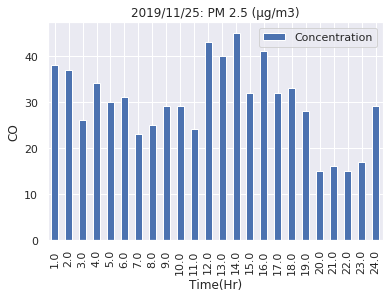

In [50]:
# --------------------------------------------
# 可以開始來繪圖
'''
dataset.plot(x='PM25', y='CO', style='o')  
plt.title('PM25 vs CO')  
plt.xlabel('PM25')  
plt.ylabel('CO')  
plt.show()
'''
df_oneday=df_oneday.astype(float)
#df_oneday.Concentration=pd.to_numeric(df_oneday.Concentration)
#df_oneday.MonitorHr=pd.to_numeric(df_oneday.MonitorHr)

#df_oneday.plot(x='MonitorHr', y='Concentration', style='o')
df_oneday.plot.bar(x='MonitorHr', y='Concentration')
plt.title(date_selected+ ': PM 2.5 (μg/m3)')
plt.xlabel('Time(Hr)')  
plt.ylabel('CO')  
plt.show()


从零开始学Python【13】--matplotlib(直方图)

https://ask.hellobi.com/blog/lsxxx2011/10241